In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Discretize the spatial and temporal domains
dx = 0.1
dt = dx**2/2 # CFL condition
x = np.arange(0, 1+dx, dx)
t = np.arange(0, 1+dt, dt)

# Initialize the solution
u = np.zeros((len(x), len(t)))
u[:,0] = np.sin(np.pi*x)

# Time-stepping loop
for n in range(1, len(t)):
    for i in range(1, len(x)-1):
        u[i,n] = u[i,n-1] + dt * (u[i+1,n-1] - 2*u[i,n-1] + u[i-1,n-1]) / dx**2
    # Apply boundary conditions
    u[0,n] = 0
    u[-1,n] = 0

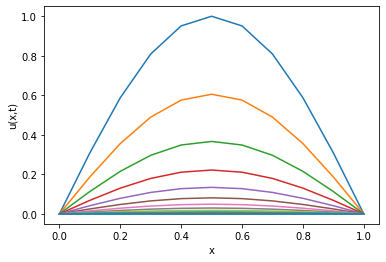

In [2]:
# Plot the solution at different time steps
for i in range(0, len(t), 10):
    plt.plot(x, u[:, i], label='t = ' + str(i*dt))
plt.xlabel('x')
plt.ylabel('u(x,t)')
plt.show()


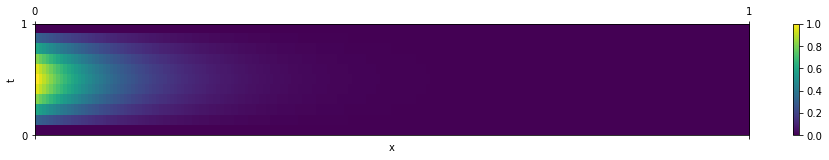

In [3]:
# Plot the solution as a heatmap
plt.matshow(u, extent=[0, 1, 0, 1], origin='lower', aspect='auto')
plt.xlabel('x')
plt.ylabel('t')
plt.colorbar()
plt.show()


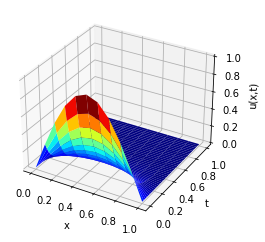

In [4]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a 3D figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the solution as a 3D surface
X, Y = np.meshgrid(x, t)
ax.plot_surface(X, Y, u.T, cmap='jet')
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('u(x,t)')
plt.show()
